In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow[and-cuda]

Note: you may need to restart the kernel to use updated packages.


In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [43]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [48]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [44]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [45]:
 # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [46]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [47]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [49]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [50]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [51]:
from tensorflow.keras.layers import MaxPooling2D

In [52]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 64)       

In [53]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [99]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [100]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [101]:
training_set

In [102]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [105]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
13/13 [==============================] - 13s 969ms/step - loss: 0.4005 - accuracy: 0.7981 - val_loss: 1.0168 - val_accuracy: 0.3657
Epoch 2/20
13/13 [==============================] - 12s 894ms/step - loss: 0.4154 - accuracy: 0.7981 - val_loss: 1.0248 - val_accuracy: 0.4179
Epoch 3/20
13/13 [==============================] - 11s 817ms/step - loss: 0.3990 - accuracy: 0.8053 - val_loss: 0.6791 - val_accuracy: 0.5746
Epoch 4/20
13/13 [==============================] - 11s 815ms/step - loss: 0.3189 - accuracy: 0.8630 - val_loss: 0.6977 - val_accuracy: 0.6045
Epoch 5/20
13/13 [==============================] - 11s 813ms/step - loss: 0.3247 - accuracy: 0.8582 - val_loss: 0.6025 - val_accuracy: 0.6045
Epoch 6/20
13/13 [==============================] - 13s 975ms/step - loss: 0.2475 - accuracy: 0.8990 - val_loss: 0.5820 - val_accuracy: 0.6866
Epoch 7/20
13/13 [==============================] - 13s 949ms/step - loss: 0.2131 - accuracy: 0.9351 - val_loss: 0.5023 - val_accuracy: 0.7239

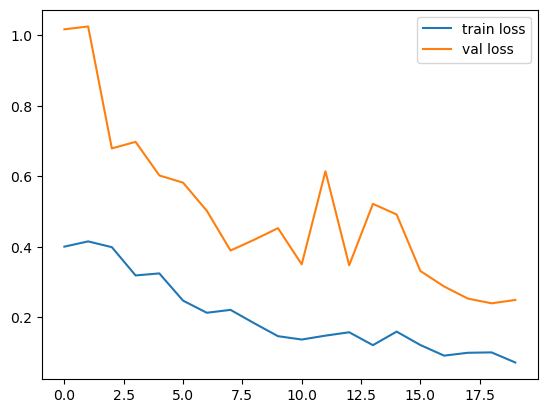

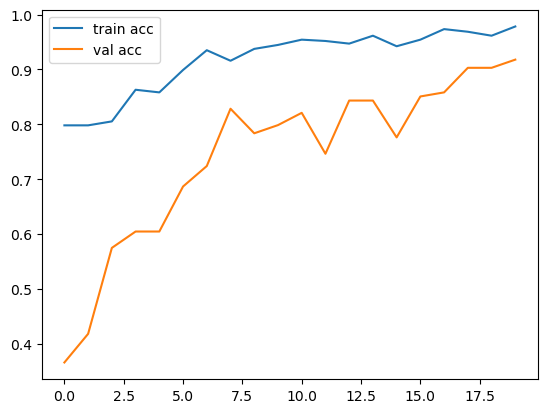

<Figure size 640x480 with 0 Axes>

In [106]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [107]:
# save it as a h5 file


from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [108]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 133ms/step


In [109]:
y_pred

array([[4.69239026e-01, 5.30760944e-01],
       [9.99977350e-01, 2.26186421e-05],
       [7.99046397e-01, 2.00953588e-01],
       [9.46982205e-02, 9.05301809e-01],
       [7.98838064e-02, 9.20116186e-01],
       [9.95822072e-01, 4.17792099e-03],
       [9.58052278e-01, 4.19477671e-02],
       [6.12852573e-01, 3.87147456e-01],
       [3.44569795e-02, 9.65543032e-01],
       [1.00000000e+00, 2.60036046e-08],
       [5.94366975e-02, 9.40563321e-01],
       [9.99997020e-01, 3.01856858e-06],
       [9.97782171e-01, 2.21782224e-03],
       [9.96948421e-01, 3.05160601e-03],
       [2.12978989e-01, 7.87020981e-01],
       [6.35824859e-01, 3.64175081e-01],
       [5.06057143e-01, 4.93942887e-01],
       [7.37254173e-02, 9.26274538e-01],
       [1.96674272e-01, 8.03325772e-01],
       [1.00000000e+00, 1.61399282e-13],
       [4.64922264e-02, 9.53507841e-01],
       [9.99997258e-01, 2.71590307e-06],
       [1.00000000e+00, 4.97456199e-12],
       [9.63833809e-01, 3.61662395e-02],
       [9.987761

In [110]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [111]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0], dtype=int64)

In [112]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [113]:
model=load_model('model_vgg19.h5')

In [122]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [123]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [124]:
x.shape

(224, 224, 3)

In [125]:
x=x/255

In [126]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [130]:
model.predict(img_data)

1/1 [==============================] - 0s 61ms/step


array([[1., 0.]], dtype=float32)

In [131]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 67ms/step


In [132]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
